In [51]:
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [52]:
#   initializing the variables

plt.figure(figsize=(20, 20))


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [83]:
File_list = [
    'US data/export.csv',
    'AUS_Forgien_Country.csv'
]


[data URL](https://data.census.gov/mdat/#/search?ds=ACSPUMS5Y2020&vv=AGEP&cv=AGEP_RC1&rv=POBP&AGEP_RC1=%7B%22S%22%3A%22Age%20recode%20%20AU%22%2C%22R%22%3A%22AGEP%22%2C%22W%22%3A%22PWGTP%22%2C%22V%22%3A%5B%5B%221%3A4%2C0%22%2C%22Between%200%20and%204%22%5D%2C%5B%225%3A14%22%2C%22Between%205%20and%2014%22%5D%2C%5B%2215%3A24%22%2C%22Between%2015%20and%2024%22%5D%2C%5B%2225%3A44%22%2C%22Between%2025%20and%2044%22%5D%2C%5B%2255%3A55%22%2C%22Between%2045%20and%2055%22%5D%2C%5B%2285%3A99%22%2C%22Between%2085%20and%20Over%22%5D%2C%5B%2245%3A54%22%2C%22Between%2045%20and%2054%22%5D%2C%5B%2256%3A64%22%2C%22Between%2056%20and%2064%22%5D%2C%5B%2265%3A74%22%2C%22Between%2064%20and%2074%22%5D%2C%5B%2275%3A84%22%2C%22Between%2075%20and%2084%22%5D%5D%7D)

In [54]:
def read_file(file: str) -> list:
    with open(file) as fin:
        __reader = list(csv.reader(fin, delimiter=','))
    return __reader


In [86]:

data_raw = read_file(File_list[0])

del data_raw[:4]
header = [' '.join(re.findall(r'\w{3,}', head)) for head in data_raw[0] ] 
del data_raw[0]


In [85]:
def clean_Name(name:str)-> str:
    return ' '.join(re.findall(r'\w{3,}', name))

In [87]:
def map_to_dic(raw: list, header: list) -> dict:
    __Data = {name: [] for name in header}
    for __index, value in enumerate(header):
        if __index == 0:
            __Data[header[__index]] = np.array([clean_Name(row[__index]) for row in raw])
        else:
            __Data[header[__index]] = np.array([int(row[__index]) for row in raw])

    return __Data


In [96]:
re.sub(r'\([^)]*\)', '', 'Place of birth (Recode)')

'Place of birth '

In [88]:
map_to_dic(data_raw, header)


{'Place birth Recode': array(['Total', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
        'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa', 'Guam',
        'Commonwealth the Northern Mariana Islands', 'Puerto Rico',
        'Virgin Islands', 'Albania', 'Austria', 'Belgium', 'Bulgaria',
        'Czechoslovakia', 'Denmark', 'Finland', 'France', 'Germany',
    

In [78]:
data = map_to_dic(data_raw, header)
for item in data.values():
    print(len(item))


226
226
226
226
226
226
226
226
226
226
226


# State list

[ListURl](https://data.census.gov/mdat/#/search?ds=ACSPUMS1Y2019&rv=ucgid&nv=MIGSP&g=0400000US01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56)

In [20]:


with open(File_list[2]) as fin:
    AU_cournty = csv.reader(fin)
    AU_cournty = [item[0] for item in AU_cournty]
del AU_cournty[0]
AU_cournty[:-3]

index_list = np.where(
    [item in AU_cournty for item in data['Place of birth (Recode)']])

data['Place of birth (Recode)'] = np.array([])

# del AU_cournty[0][0]
# np.array(AU_cournty)

# temp = []
# for place in data['Place of birth (Recode)']:
#     place_index = data['Place of birth (Recode)'].index(place)
#     place = ' '.join(re.findall(r'\w{3,}', place))
#     if place == 'Total':
#         continue
#     elif place in US_State_list_cleaned:   #  any(place == s for s in US_State_list_cleaned):

#         try:
#           temp.append(data['Place of birth (Recode)'].pop(place_index))
#         except:
#           temp.append(data['Place of birth (Recode)'].pop(data['Place of birth (Recode)'].index(place)))


In [29]:
for key, value in data.items():
    if key == 'Place of birth (Recode)':
        continue
    data[key] = np.array(value)


In [30]:
for item in data.values():
    print(len(item))


226
226
226
226
226
226
226
226
226
226


In [18]:
place = np.array(data['Place of birth (Recode)'], dtype=str)[index_list]
value = np.array(data['Total'])[index_list]


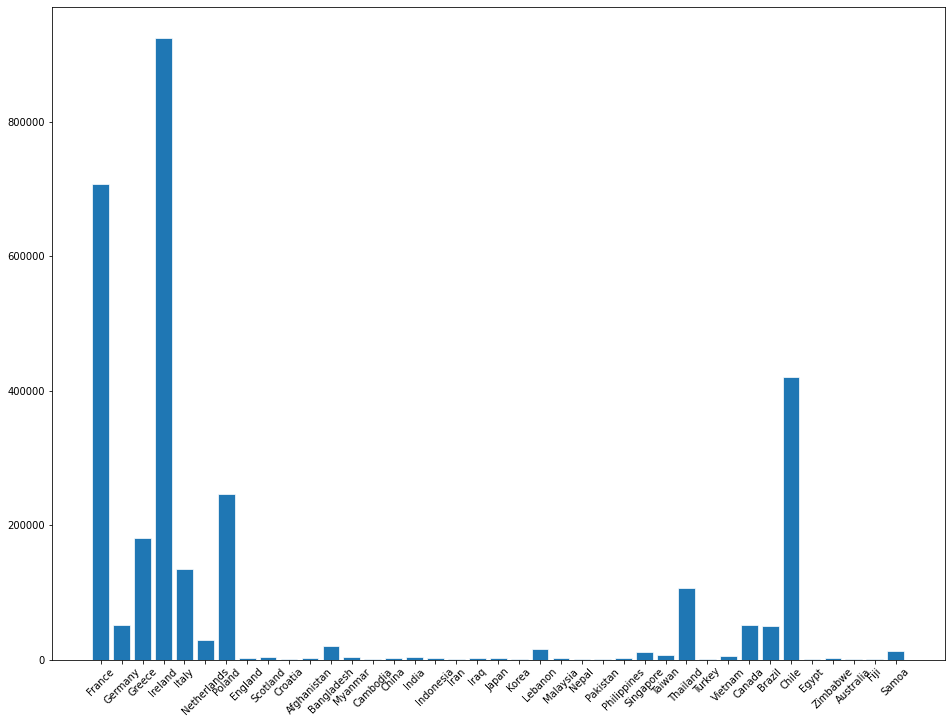

In [265]:
# plot
fig, ax = plt.subplots(figsize=(16, 12))

data_len = len(index_list)
ax.bar(place, value, edgecolor="white", linewidth=0.7)

#ax.set_xticklabels(ax.get_yticks(), rotation = 90)
plt.xticks(rotation=45)
plt.show()


<AxesSubplot:>

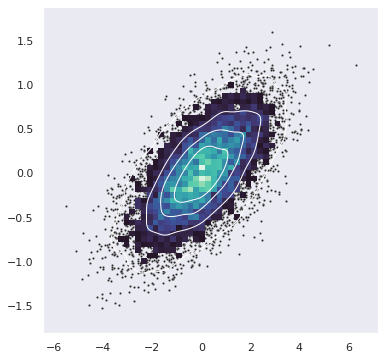

In [266]:
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)


In [32]:

g = sns.clustermap()


TypeError: unhashable type: 'slice'

In [34]:
type(data)


dict